In [2]:
import pandas as pd
import numpy as np

In [3]:
raw_ww = pd.read_csv('raw_ww.csv')
raw_ww.head()

,day,testing_day,wastewater_signal
0,10-Sep-23,1,1.0
1,11-Sep-23,1,0.0
2,12-Sep-23,0,NaN
3,13-Sep-23,1,0.0
4,14-Sep-23,0,NaN


In [4]:
raw_ww['day'] = pd.to_datetime(raw_ww['day'], format='%d-%b-%y')
raw_ww.head()

,day,testing_day,wastewater_signal
0,2023-09-10,1,1.0
1,2023-09-11,1,0.0
2,2023-09-12,0,NaN
3,2023-09-13,1,0.0
4,2023-09-14,0,NaN


In [5]:
pl_cases = pd.read_csv('pl_cases.csv')
pl_cases

,onset_date,sd_resident,pl_resident,pl_association,shed_start,shed_end,original_inclusion
0,9-Nov-23,1,1,"SD Resident, PL Resident",26-Oct-23,16-Nov-23,1
1,22-Nov-23,1,1,"SD Resident, PL Resident",8-Nov-23,29-Nov-23,1
2,23-Nov-23,1,1,"SD Resident, PL Resident",9-Nov-23,30-Nov-23,1
3,24-Nov-23,1,1,"SD Resident, PL Resident",10-Nov-23,1-Dec-23,1
4,2-Dec-23,1,1,"SD Resident, PL Resident",18-Nov-23,9-Dec-23,1
5,8-Jan-24,1,1,"SD Resident, PL Resident",25-Dec-23,15-Jan-24,1
6,19-Jan-24,1,1,"SD Resident, PL Resident",5-Jan-24,26-Jan-24,1
7,20-Jan-24,1,1,"SD Resident, PL Resident",6-Jan-24,27-Jan-24,1
8,23-Jan-24,1,1,"SD Resident, PL Resident",9-Jan-24,30-Jan-24,1
9,25-Mar-24,1,1,"SD Resident, PL Resident",11-Mar-24,1-Apr-24,1


In [6]:
pl_cases

,onset_date,sd_resident,pl_resident,pl_association,shed_start,shed_end,original_inclusion
0,9-Nov-23,1,1,"SD Resident, PL Resident",26-Oct-23,16-Nov-23,1
1,22-Nov-23,1,1,"SD Resident, PL Resident",8-Nov-23,29-Nov-23,1
2,23-Nov-23,1,1,"SD Resident, PL Resident",9-Nov-23,30-Nov-23,1
3,24-Nov-23,1,1,"SD Resident, PL Resident",10-Nov-23,1-Dec-23,1
4,2-Dec-23,1,1,"SD Resident, PL Resident",18-Nov-23,9-Dec-23,1
5,8-Jan-24,1,1,"SD Resident, PL Resident",25-Dec-23,15-Jan-24,1
6,19-Jan-24,1,1,"SD Resident, PL Resident",5-Jan-24,26-Jan-24,1
7,20-Jan-24,1,1,"SD Resident, PL Resident",6-Jan-24,27-Jan-24,1
8,23-Jan-24,1,1,"SD Resident, PL Resident",9-Jan-24,30-Jan-24,1
9,25-Mar-24,1,1,"SD Resident, PL Resident",11-Mar-24,1-Apr-24,1


In [7]:
testing = raw_ww[raw_ww['testing_day'] == 1]
testing.head()

,day,testing_day,wastewater_signal
0,2023-09-10,1,1.0
1,2023-09-11,1,0.0
3,2023-09-13,1,0.0
7,2023-09-17,1,0.0
8,2023-09-18,1,0.0


/var/folders/7x/6kg4d8s50wb5hn2x8q2j7c800000gn/T/ipykernel_19079/928728000.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pl_assoc['onset_date'] = pd.to_datetime(pl_assoc['onset_date'])
/var/folders/7x/6kg4d8s50wb5hn2x8q2j7c800000gn/T/ipykernel_19079/928728000.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pl_assoc['shed_start'] = pd.to_datetime(pl_assoc['shed_start'])
/var/folders/7x/6kg4d8s50wb5hn2x8q2j7c800000gn/T/ipykernel_19079/928728000.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pl_assoc['shed_end'] = pd.to_datetime(pl_assoc['shed_end'])
/var/fol

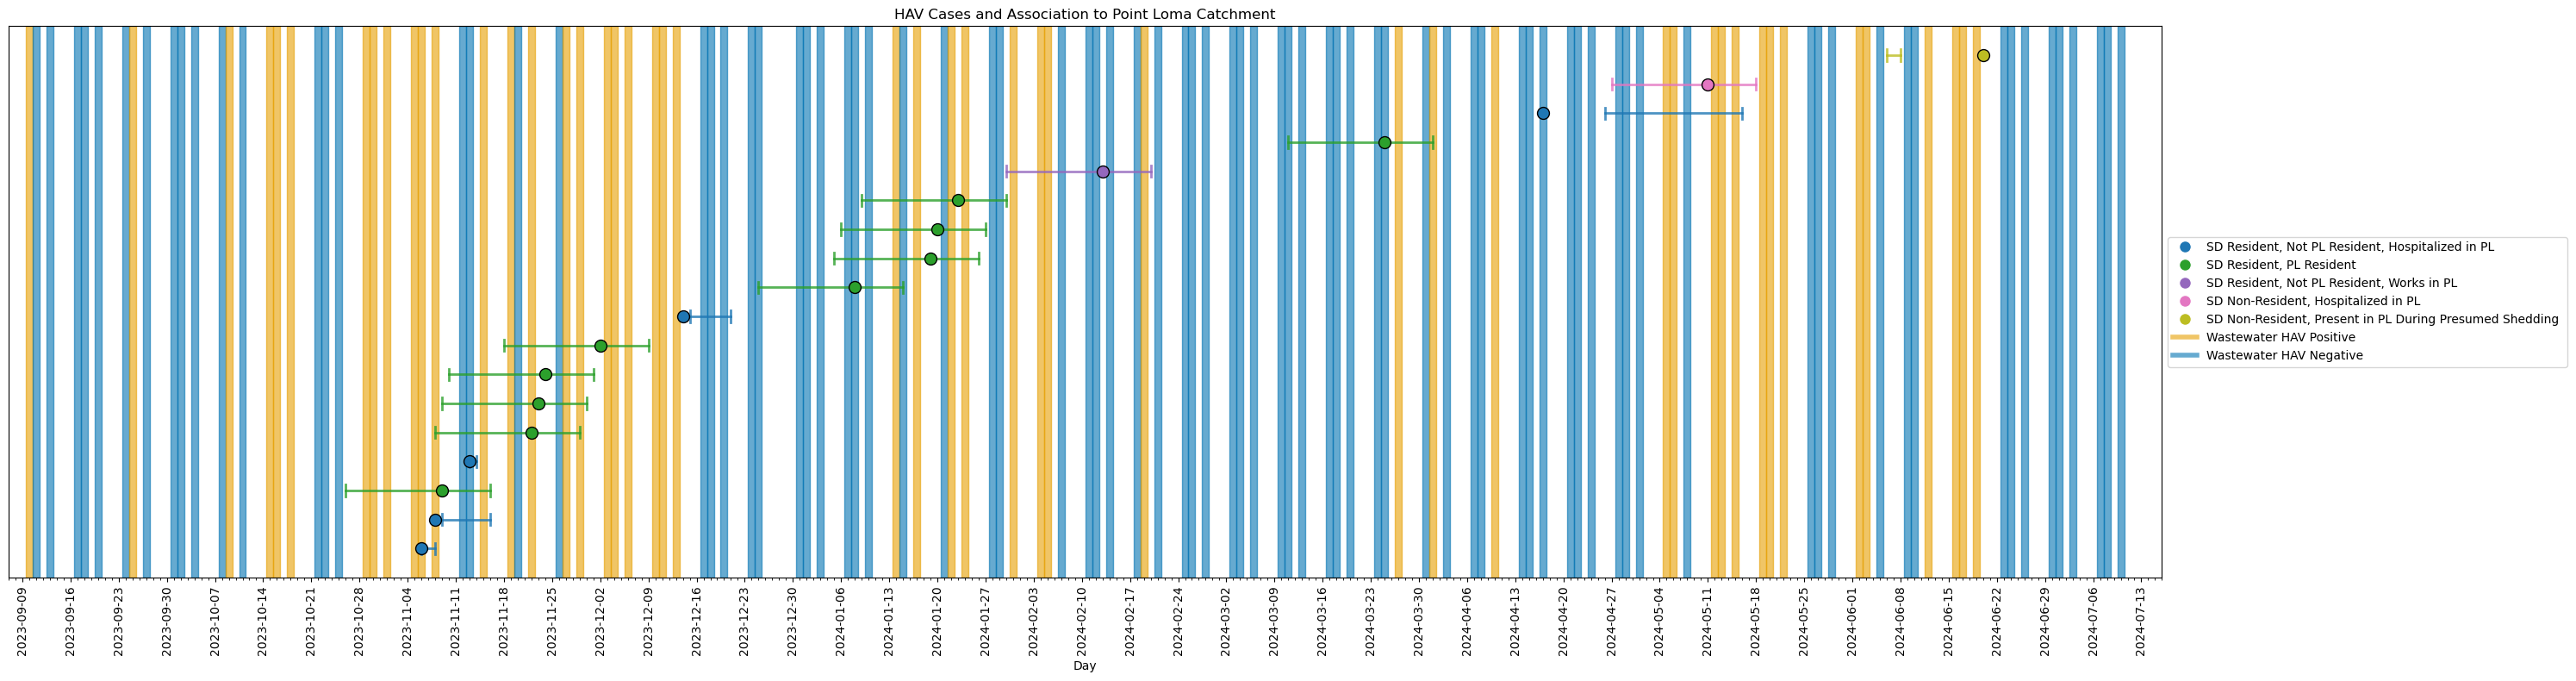

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.cm import get_cmap

pl_cases = pl_cases.copy()


raw_ww['day'] = pd.to_datetime(raw_ww['day'])
pl_cases['onset_date'] = pd.to_datetime(pl_cases['onset_date'])
pl_cases['shed_start'] = pd.to_datetime(pl_cases['shed_start'])
pl_cases['shed_end'] = pd.to_datetime(pl_cases['shed_end'])


pl_assoc.loc[:, 'y_position'] = range(1, len(pl_assoc) + 1)


unique_associations = pl_assoc['pl_association'].dropna().unique()


colors = get_cmap('tab10')  # High-contrast colormap
color_map = {association: colors(i / len(unique_associations)) for i, association in enumerate(unique_associations)}


fig, ax = plt.subplots(figsize=(30, 8))  # Elongated figure


for idx, row in raw_ww.iterrows():
    if row['testing_day'] == 1:
        color = '#E69F00' if row['wastewater_signal'] == 1 else '#0072B2'
        ax.axvspan(row['day'] - pd.Timedelta(days=0.5), row['day'] + pd.Timedelta(days=0.5), color=color, alpha=0.6)


for _, row in pl_assoc.iterrows():
    dot_color = color_map.get(row['pl_association'], 'gray')  

    if pd.notna(row['shed_start']) and pd.notna(row['shed_end']):
        # Shedding period bar
        ax.plot([row['shed_start'], row['shed_end']], [row['y_position'], row['y_position']], color=dot_color, linewidth=2, alpha=0.8)
        # Horizontal lines at each end of the bar
        ax.plot([row['shed_start'], row['shed_start']], [row['y_position'] - 0.2, row['y_position'] + 0.2], color=dot_color, linewidth=2, alpha=0.8)
        ax.plot([row['shed_end'], row['shed_end']], [row['y_position'] - 0.2, row['y_position'] + 0.2], color=dot_color, linewidth=2, alpha=0.8)

    if pd.notna(row['onset_date']):
        ax.scatter(row['onset_date'], row['y_position'], color=dot_color, edgecolor='black', s=100, zorder=5)


ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.tick_params(axis='x', which='major', labelrotation=90)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)


ax.tick_params(axis='y', which='major', left=False, labelleft=False)

# Add labels and title
ax.set_xlabel('Day')
ax.set_title('HAV Cases and Association to Point Loma Catchment')

# Extend the x-axis to fit all data
ax.set_xlim(pd.Timestamp(raw_ww['day'].min()) - pd.Timedelta(days=3), pd.Timestamp(raw_ww['day'].max()) + pd.Timedelta(days=3))

# Set the y-axis limits to fit all lines
ax.set_ylim(0, len(pl_assoc) + 1)

# Create legend elements dynamically for associations
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[association], markersize=10, 
               label=association) for association in unique_associations
]

# Add the wastewater signal legend elements
legend_elements += [
    plt.Line2D([0], [0], color='#E69F00', lw=4, alpha=0.6, label='Wastewater HAV Positive'),
    plt.Line2D([0], [0], color='#0072B2', lw=4, alpha=0.6, label='Wastewater HAV Negative')
]

# Position the legend outside the graph body
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Tight layout
plt.tight_layout()

# Display the plot
plt.show()

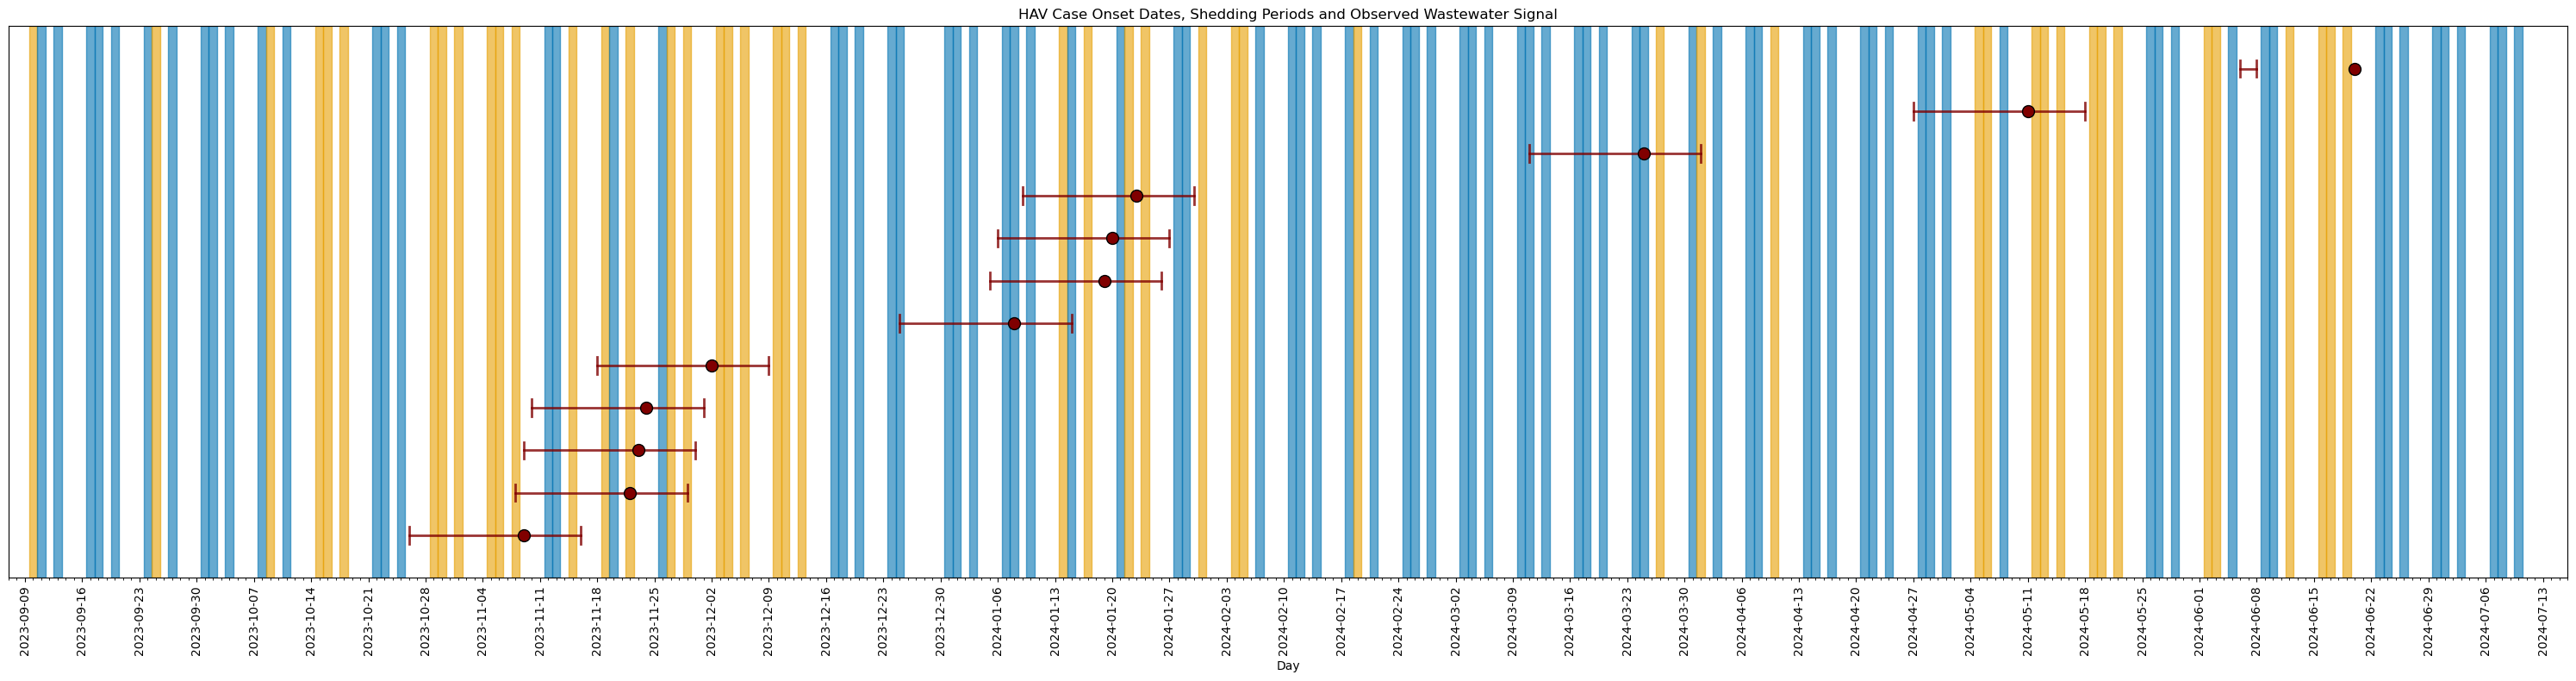

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.cm import get_cmap

pl_cases = pl_cases.copy()


raw_ww['day'] = pd.to_datetime(raw_ww['day'])
pl_cases['onset_date'] = pd.to_datetime(pl_cases['onset_date'])
pl_cases['shed_start'] = pd.to_datetime(pl_cases['shed_start'])
pl_cases['shed_end'] = pd.to_datetime(pl_cases['shed_end'])


# Assign unique y positions dynamically
pl_cases.loc[:, 'y_position'] = range(1, len(pl_cases) + 1)

# Create the figure
fig, ax = plt.subplots(figsize=(30, 8))  # Elongated figure

# Add background shading for wastewater signals
for idx, row in raw_ww.iterrows():
    if row['testing_day'] == 1:
        color = '#E69F00' if row['wastewater_signal'] == 1 else '#0072B2'
        ax.axvspan(row['day'] - pd.Timedelta(days=0.5), row['day'] + pd.Timedelta(days=0.5), color=color, alpha=0.6)

# Plot each case as a horizontal line and/or a dot in maroon
for _, row in pl_assoc_filtered.iterrows():
    dot_color = '#800000'  # Maroon color for all filtered rows
    # Plot the horizontal line (shedding period) if available
    if pd.notna(row['shed_start']) and pd.notna(row['shed_end']):
        # Shedding period bar
        ax.plot([row['shed_start'], row['shed_end']], [row['y_position'], row['y_position']], color=dot_color, linewidth=2, alpha=0.8)
        # Horizontal lines at each end of the bar
        ax.plot([row['shed_start'], row['shed_start']], [row['y_position'] - 0.2, row['y_position'] + 0.2], color=dot_color, linewidth=2, alpha=0.8)
        ax.plot([row['shed_end'], row['shed_end']], [row['y_position'] - 0.2, row['y_position'] + 0.2], color=dot_color, linewidth=2, alpha=0.8)
    # Add a dot on the onset date with full opacity
    if pd.notna(row['onset_date']):
        ax.scatter(row['onset_date'], row['y_position'], color=dot_color, edgecolor='black', s=100, zorder=5)

# Apply formatting for the x-axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.tick_params(axis='x', which='major', labelrotation=90)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)

# Remove the y-axis ticks and labels
ax.tick_params(axis='y', which='major', left=False, labelleft=False)

# Add labels and title
ax.set_xlabel('Day')
ax.set_title('HAV Case Onset Dates, Shedding Periods and Observed Wastewater Signal')

# Extend the x-axis to fit all data
ax.set_xlim(pd.Timestamp(raw_ww['day'].min()) - pd.Timedelta(days=3), pd.Timestamp(raw_ww['day'].max()) + pd.Timedelta(days=3))

# Set the y-axis limits to fit all lines
ax.set_ylim(0, len(pl_assoc_filtered) + 1)

# Tight layout
plt.tight_layout()

# Display the plot
plt.show()


### Sensitivity Analysis